<a href="https://colab.research.google.com/github/Chinthaka-Sharuna/Telco-Customer-Churn-Prediction-System/blob/main/Telco_Customer_Churn_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [320]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

Read the Dataset

In [321]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [322]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telco Customer Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [324]:
#checking null values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [325]:
#checking NA values
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [326]:
#rename tenure column to CustomerDuration
data.rename(columns={'tenure':'CustomerDuration'},inplace=True)
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'CustomerDuration', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [327]:
data['gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [328]:
#checking gender columns values
data['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [329]:
#rename the SeniorCitizen to IsSeniorCitizen
data.rename(columns={'SeniorCitizen':'IsSeniorCitizen'},inplace=True)

In [330]:
#checking Partner columns values
data['Partner'].value_counts()
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'Partner', 'Dependents',
       'CustomerDuration', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [331]:
#rename Partner to HasPartner
data.rename(columns={'Partner':'HasPartner'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner', 'Dependents',
       'CustomerDuration', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [332]:
#rename Dependents to HasDependents
data.rename(columns={'Dependents':'HasDependents'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [333]:
#checking PhoneService columns values
data['PhoneService'].value_counts()

,count
PhoneService,
Yes,6361
No,682


In [334]:
data.rename(columns={'PhoneService':'HasPhoneService'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [335]:
data['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [336]:
data.rename(columns={'MultipleLines':'HasMultipleLines'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [337]:
data['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [338]:
data['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526


In [339]:
data.rename(columns={'OnlineSecurity':'HasOnlineSecurity'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [340]:
data['OnlineBackup'].value_counts()

,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526


In [341]:
data.rename(columns={'OnlineBackup':'HasOnlineBackup'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [342]:
data['DeviceProtection'].value_counts()

,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


In [343]:
data.rename(columns={'DeviceProtection':'HasDeviceProtection'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'HasDeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [344]:
data['TechSupport'].value_counts()

,count
TechSupport,
No,3473
Yes,2044
No internet service,1526


In [345]:
data.rename(columns={'TechSupport':'HasTechSupport'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [346]:
data['StreamingTV'].value_counts()

,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526


In [347]:
data.rename(columns={'StreamingTV':'HasStreamingTV'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupport',
       'HasStreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [348]:
data['StreamingMovies'].value_counts()

,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526


In [349]:
data.rename(columns={'StreamingMovies':'HasStreamingMovies'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupport',
       'HasStreamingTV', 'HasStreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [350]:
data['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [351]:
data['PaymentMethod'].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [352]:
data['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
Yes,4171
No,2872


In [353]:
data.rename(columns={'PaperlessBilling':'IsPaperlessBilling'},inplace=True)
data.columns

Index(['customerID', 'gender', 'IsSeniorCitizen', 'HasPartner',
       'HasDependents', 'CustomerDuration', 'HasPhoneService',
       'HasMultipleLines', 'InternetService', 'HasOnlineSecurity',
       'HasOnlineBackup', 'HasDeviceProtection', 'HasTechSupport',
       'HasStreamingTV', 'HasStreamingMovies', 'Contract',
       'IsPaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [354]:
mask=data['customerID'].duplicated()
data[mask]

,customerID,gender,IsSeniorCitizen,HasPartner,HasDependents,CustomerDuration,HasPhoneService,HasMultipleLines,InternetService,HasOnlineSecurity,...,HasDeviceProtection,HasTechSupport,HasStreamingTV,HasStreamingMovies,Contract,IsPaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [355]:
#change the data type in TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges']

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [356]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customerID           7043 non-null   object 
 1   gender               7043 non-null   object 
 2   IsSeniorCitizen      7043 non-null   int64  
 3   HasPartner           7043 non-null   object 
 4   HasDependents        7043 non-null   object 
 5   CustomerDuration     7043 non-null   int64  
 6   HasPhoneService      7043 non-null   object 
 7   HasMultipleLines     7043 non-null   object 
 8   InternetService      7043 non-null   object 
 9   HasOnlineSecurity    7043 non-null   object 
 10  HasOnlineBackup      7043 non-null   object 
 11  HasDeviceProtection  7043 non-null   object 
 12  HasTechSupport       7043 non-null   object 
 13  HasStreamingTV       7043 non-null   object 
 14  HasStreamingMovies   7043 non-null   object 
 15  Contract             7043 non-null   o

In [357]:
#delete the columns which is CustomerDuration equal to 0
rows_to_drop = data[data['CustomerDuration'] == 0].index
data.drop(rows_to_drop, axis=0, inplace=True)
print(len(rows_to_drop)," Deleted ")
rows_to_drop

11  Deleted 


Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [358]:
#replace NA value with 0
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [359]:
#fix the values in TotalCharges
calculated_charge = data['MonthlyCharges'] * data['CustomerDuration']

data['TotalCharges'] = np.where(
    data['TotalCharges'] - calculated_charge <= 0,
    data['TotalCharges'],
    calculated_charge
)

In [360]:
data.drop(columns=['customerID'], inplace=True)

In [361]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7032 non-null   object 
 1   IsSeniorCitizen      7032 non-null   int64  
 2   HasPartner           7032 non-null   object 
 3   HasDependents        7032 non-null   object 
 4   CustomerDuration     7032 non-null   int64  
 5   HasPhoneService      7032 non-null   object 
 6   HasMultipleLines     7032 non-null   object 
 7   InternetService      7032 non-null   object 
 8   HasOnlineSecurity    7032 non-null   object 
 9   HasOnlineBackup      7032 non-null   object 
 10  HasDeviceProtection  7032 non-null   object 
 11  HasTechSupport       7032 non-null   object 
 12  HasStreamingTV       7032 non-null   object 
 13  HasStreamingMovies   7032 non-null   object 
 14  Contract             7032 non-null   object 
 15  IsPaperlessBilling   7032 non-null   object

Task 01

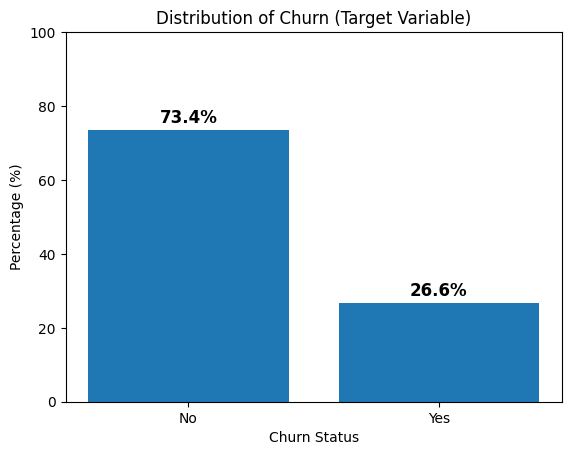

In [362]:
count=data['Churn'].value_counts()
percentages = (count.values / len(data)) * 100
bars=plt.bar(count.index,percentages,align='center')
plt.title('Distribution of Churn (Target Variable)')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1,
             f'{yval:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.ylabel('Percentage (%)')
plt.xlabel('Churn Status')
plt.show()

The dataset shows a clear class imbalance. The majority of customers (73.4%) did not churn, while only 26.6% discontinued the service. This indicates that 'Churn' is the minority class.

Significance for Modeling: Because the data is imbalanced, a baseline model could achieve ~73% accuracy simply by predicting 'No' for everyone. Therefore, we cannot rely solely on Accuracy to evaluate our models in Task 2. We must prioritize metrics like F1-Score, Precision, and Recall to ensure the model is actually learning to detect the churners.

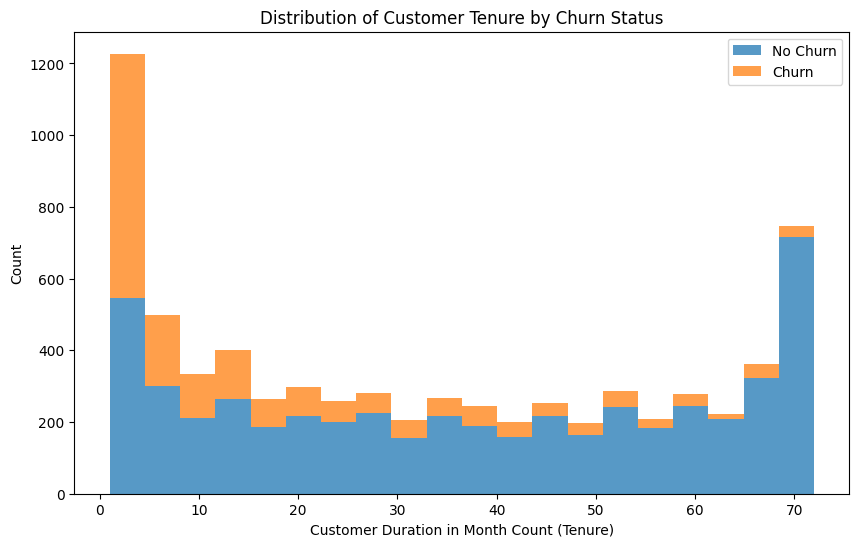

In [363]:
churn_yes = data[data['Churn'] == 'Yes']['CustomerDuration']
churn_no = data[data['Churn'] == 'No']['CustomerDuration']
# Plot histogram with two datasets
plt.figure(figsize=(10, 6))
plt.hist([churn_no, churn_yes], bins=20, label=['No Churn', 'Churn'],
         color=['#1f77b4', '#ff7f0e'], alpha=0.75, stacked=True)
plt.title('Distribution of Customer Tenure by Churn Status')
plt.xlabel('Customer Duration in Month Count (Tenure)')
plt.ylabel('Count')
plt.legend()
plt.show()


High Risk for New Customers: The tallest orange bar is on the far left. This indicates that churn is highest among new customers. A significant portion of customers leave within their first few months of service.

Loyalty over Time: As tenure increases (moving right on the graph), the orange bars (churn) shrink significantly, while the blue bars (retained customers) grow.

Long-term Stability: There is a large spike of loyal customers at the 70+ month mark who have very low churn rates.

Conclusion: The first few months are the most critical for retention. If a customer stays past the initial 6-12 month period, they are much more likely to become a long-term, loyal subscriber."


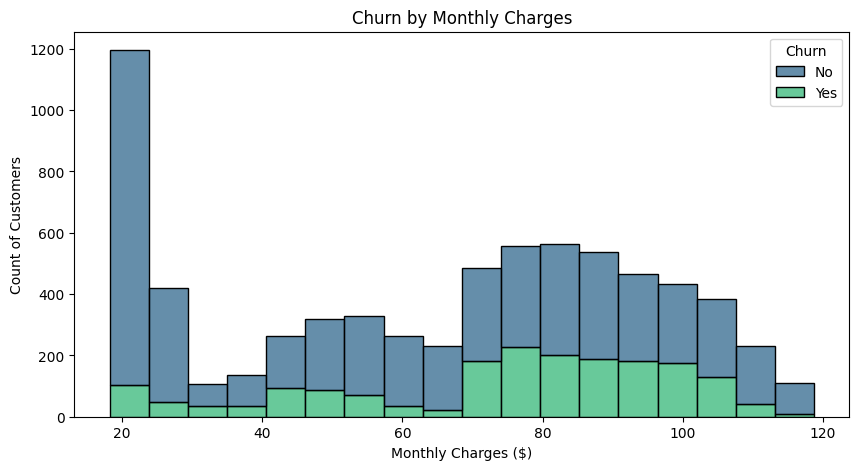

In [364]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple='stack', palette='viridis')
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count of Customers')
plt.show()

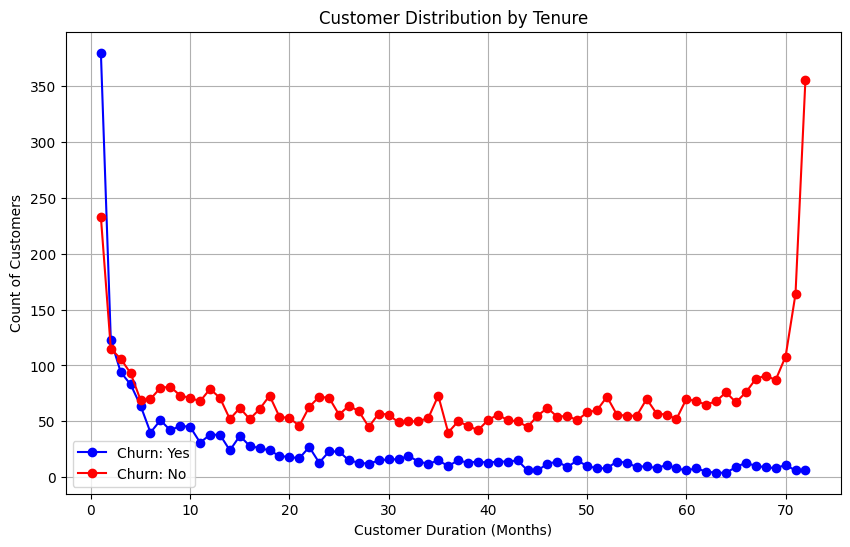

In [365]:
#1.Create the data seys
churned_yes_data = data[data['Churn'] == 'Yes']
duration_counts_yes = churned_yes_data['CustomerDuration'].value_counts().sort_index()

churned_no_data = data[data['Churn'] == 'No']
duration_counts_no = churned_no_data['CustomerDuration'].value_counts().sort_index()

# 2. Create the Line Chart
plt.figure(figsize=(10, 6))
plt.plot(duration_counts_yes.index, duration_counts_yes.values, marker='o', linestyle='-', color='blue',label='Churn: Yes')
plt.plot(duration_counts_no.index, duration_counts_no.values, marker='o', linestyle='-', color='red',label='Churn: No')

# 3. Formatting
plt.title('Customer Distribution by Tenure')
plt.xlabel('Customer Duration (Months)')
plt.ylabel('Count of Customers')
plt.grid(True)
plt.legend()
plt.show()

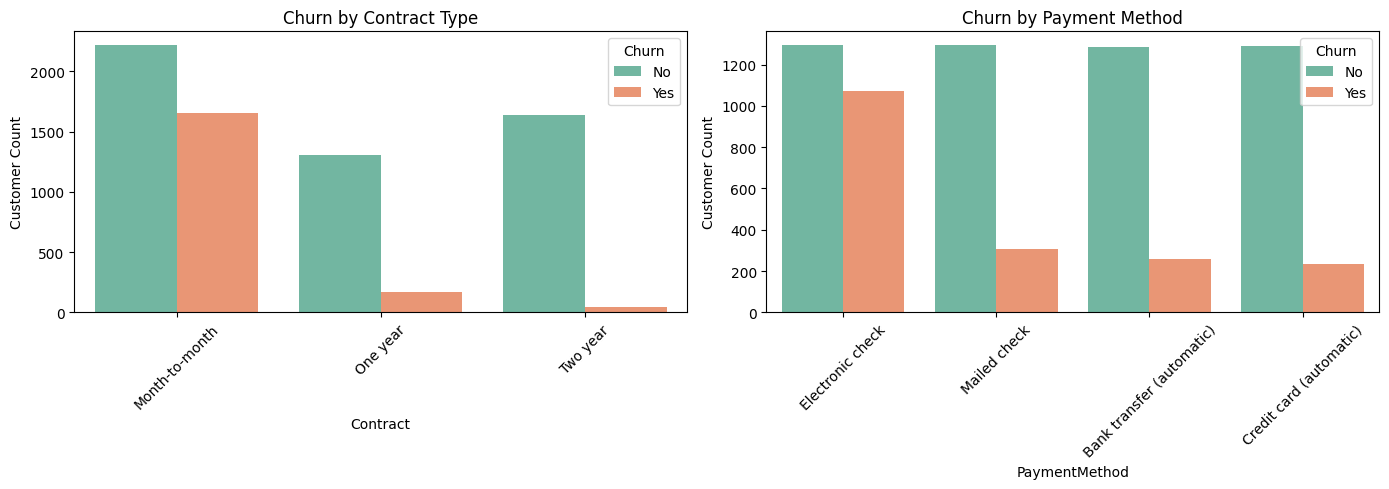

In [366]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graph 1: Contract Type
sns.countplot(x='Contract', hue='Churn', data=data, palette='Set2', ax=axes[0])
axes[0].set_title('Churn by Contract Type')
axes[0].set_ylabel('Customer Count')
axes[0].tick_params(axis='x', rotation=45)

# Graph 2: Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='Set2', ax=axes[1])
axes[1].set_title('Churn by Payment Method')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Customer Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [367]:
df_copy=data.copy()
df_copy['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


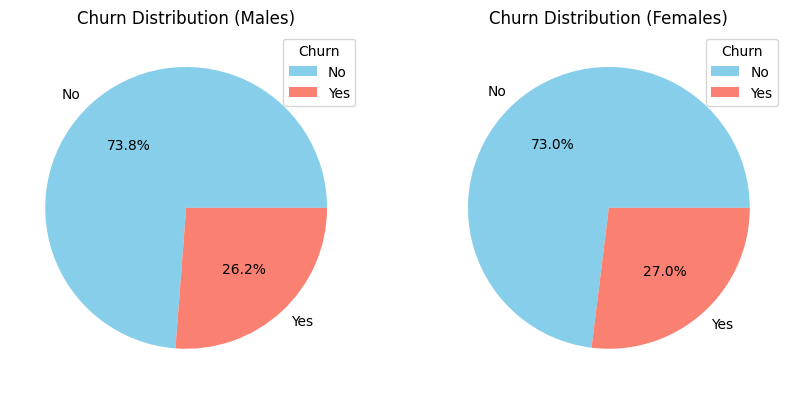

In [368]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

male_churn = data[data['gender'] == 'Male']['Churn'].value_counts()

female_churn = data[data['gender'] == 'Female']['Churn'].value_counts()

axes[0].pie(male_churn, labels=male_churn.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[0].set_title('Churn Distribution (Males)')
axes[0].legend(title='Churn', loc='upper right')

axes[1].pie(female_churn, labels=female_churn.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
axes[1].set_title('Churn Distribution (Females)')
axes[1].legend(title='Churn', loc='upper right')


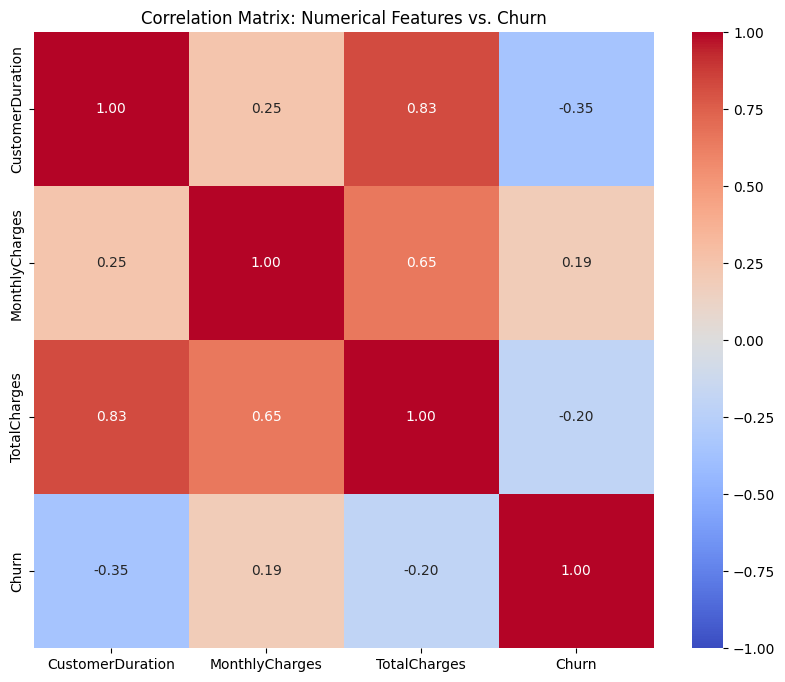

In [369]:

df_corr = data.copy()
# 1. Convert Churn to numbers (Yes=1, No=0) so it appears in the matrix
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

# 2. Select only numerical columns
numeric_cols = ['CustomerDuration', 'MonthlyCharges', 'TotalCharges', 'Churn']
corr_matrix = df_corr[numeric_cols].corr()

# 3. Plot the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Numerical Features vs. Churn')
plt.show()

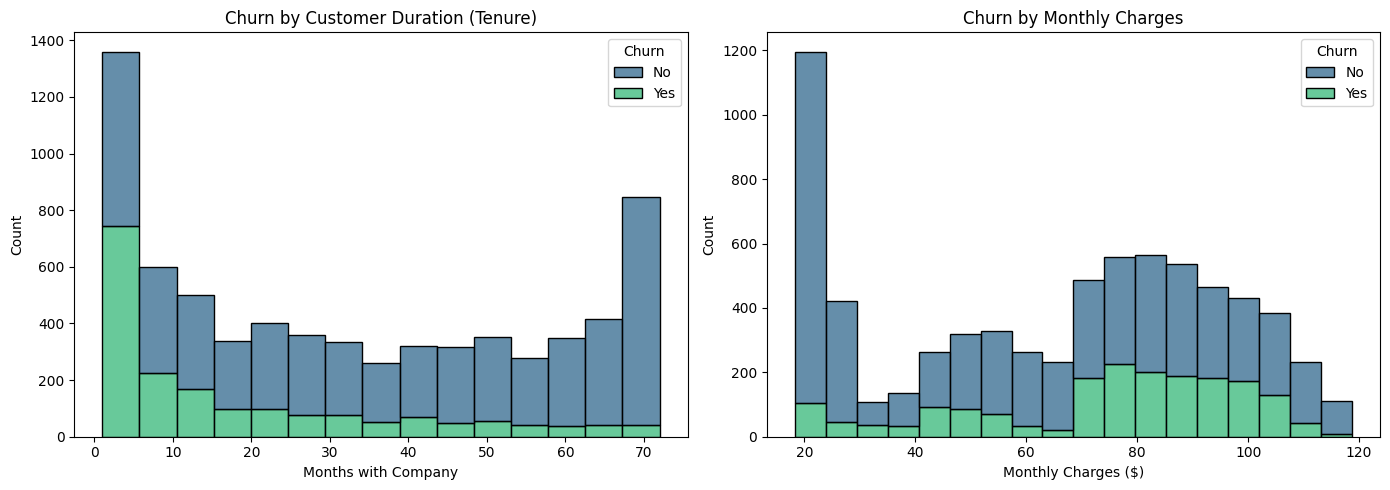

In [370]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graph 1: Customer Duration vs Churn
sns.histplot(data=data, x='CustomerDuration', hue='Churn', multiple='stack', palette='viridis', ax=axes[0])
axes[0].set_title('Churn by Customer Duration (Tenure)')
axes[0].set_xlabel('Months with Company')

# Graph 2: Monthly Charges vs Churn
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', multiple='stack', palette='viridis', ax=axes[1])
axes[1].set_title('Churn by Monthly Charges')
axes[1].set_xlabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

**Task 02: Data Preprocessing**

In [372]:
# 1. Create a copy of the dataframe for modeling
df_model = data.copy()

# Dropping the 'TotalCharges' column
df_model.drop('TotalCharges', axis=1, inplace=True)

# 2. Convert Binary Columns (Yes/No) to 0/1
le = LabelEncoder()
for col in df_model.columns:
    if df_model[col].dtype == 'object':
        if len(df_model[col].unique()) <= 2:
            df_model[col] = le.fit_transform(df_model[col])

# 3. Convert Remaining Categorical Columns
df_model = pd.get_dummies(df_model, drop_first=True)

# 4. Scale the Numerical Columns (Crucial for Neural Networks)
scaler = MinMaxScaler()
cols_to_scale = ['CustomerDuration', 'MonthlyCharges']
df_model[cols_to_scale] = scaler.fit_transform(df_model[cols_to_scale])

# 5. Split into X (Features) and y (Target)
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# 6. Split into Train and Test Sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Prepared.")
print(f"Features ready: {X_train.shape[1]}")

Data Prepared.
Features ready: 29


In [373]:
from imblearn.over_sampling import SMOTE

print("--- Before SMOTE ---")
print(y_train.value_counts())

# 1. Initialize SMOTE
smote = SMOTE(random_state=42)

# 2. Apply it ONLY to the Training Set
# We don't touch X_test because we want to test on "real" customers
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Update your training variables
X_train = X_train_resampled
y_train = y_train_resampled

print("\n--- After SMOTE (Balanced) ---")
print(y_train.value_counts())
print("Data is now balanced 50/50. Ready for training!")

--- Before SMOTE ---
Churn
0    4130
1    1495
Name: count, dtype: int64

--- After SMOTE (Balanced) ---
Churn
1    4130
0    4130
Name: count, dtype: int64
Data is now balanced 50/50. Ready for training!


In [374]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 1. Define the Model Architecture
model = Sequential([
    # Input Layer & Hidden Layer 1
    Dense(16, activation='relu'),

    # Hidden Layer 1
    Dense(8, activation='relu'),

    # Output Layer
    Dense(1, activation='sigmoid')
])

# 2. Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Train the Model
print("Starting Training...")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 4. Evaluate on Test Data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy: {accuracy * 100:.2f}%")

Starting Training...
Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5830 - loss: 0.6442 - val_accuracy: 0.5230 - val_loss: 0.8960
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7638 - loss: 0.5092 - val_accuracy: 0.6955 - val_loss: 0.7066
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7677 - loss: 0.4855 - val_accuracy: 0.6659 - val_loss: 0.6930
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7818 - loss: 0.4612 - val_accuracy: 0.7197 - val_loss: 0.5969
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7761 - loss: 0.4570 - val_accuracy: 0.6907 - val_loss: 0.6509
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7880 - loss: 0.4465 - val_accuracy: 0.7010 - val_loss: 0.6279
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7844 - loss: 0.4490 - val_accuracy: 0.7028 - val_loss: 0.6115
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7964 - loss: 0.43

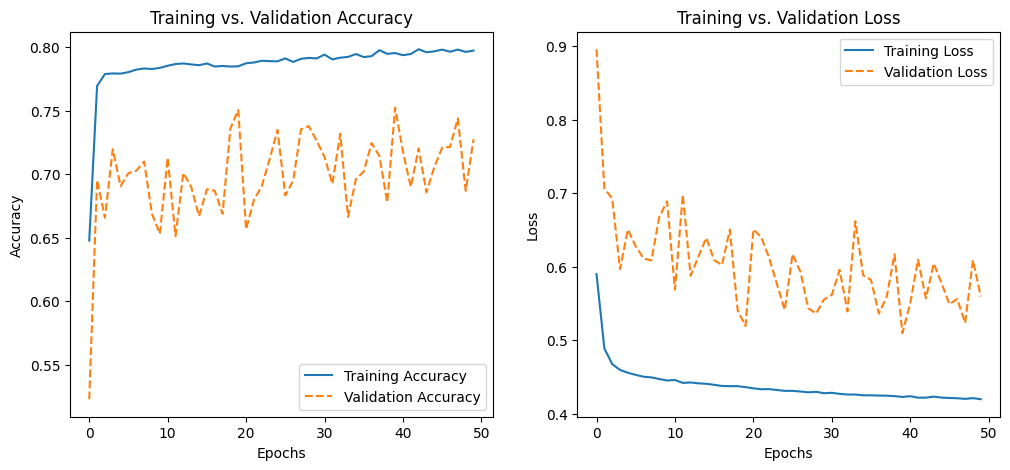

In [375]:
# 1. Capture the history from your training result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# 2. Create the plots
plt.figure(figsize=(12, 5))

# --- Graph 1: Accuracy ---
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linestyle='--')
plt.title('Training vs. Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# --- Graph 2: Loss ---
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss', linestyle='--')
plt.title('Training vs. Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Hyperparameter Tuning for Neural Network

In [376]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight

# 1. Calculate Class Weights (To make the model pay attention to Churners)
weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)
class_weights_dict = {0: weights[0], 1: weights[1]}

# 2. Build the Tuned Model (With gentler Dropout)
model_tuned = Sequential([
    Dense(16, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),

    Dense(8, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

model_tuned.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 3. Train with Class Weights
print("Training Tuned Model...")
history_tuned = model_tuned.fit(X_train, y_train,epochs=50,batch_size=32,validation_split=0.2,class_weight=class_weights_dict,verbose=0)

# 4. Predict
y_pred_prob = model_tuned.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# 5. Report
print("\nClassification Report (Tuned):")
print(classification_report(y_test, y_pred, zero_division=0))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Tuned Model...
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.57      0.64      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



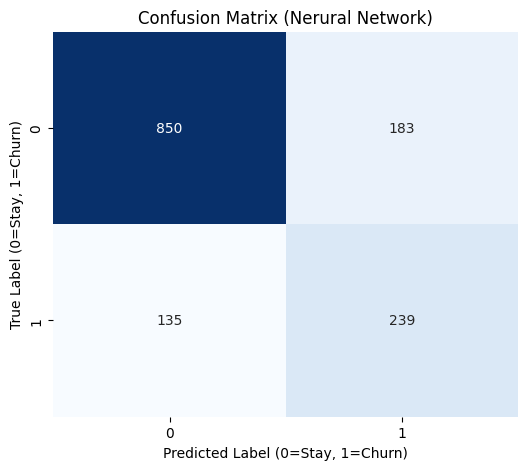

In [377]:
from sklearn.metrics import confusion_matrix

# 1. Calculate the Matrix
cm = confusion_matrix(y_test, y_pred)

# 2. Create the Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# 3. Add Labels (Critical for the report)
plt.title('Confusion Matrix (Nerural Network)')
plt.xlabel('Predicted Label (0=Stay, 1=Churn)')
plt.ylabel('True Label (0=Stay, 1=Churn)')
plt.show()

In [378]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# 1. Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# 2. Train the Model
print("Training Decision Tree...")
dt_model.fit(X_train, y_train)

# 3. Predict on Test Data
y_pred_dt = dt_model.predict(X_test)

# 4. Evaluation
dt_acc = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("-" * 30)
print("DECISION TREE RESULTS")
print("-" * 30)
print(f"Accuracy: {dt_acc * 100:.2f}%")
print(f"F1 Score: {dt_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# 5. Compare with Neural Network (NN)
try:
    nn_acc = accuracy_score(y_test, y_pred)
    print("-" * 30)
    print("MODEL COMPARISON")
    print("-" * 30)
    print(f"Neural Network Accuracy: {nn_acc * 100:.2f}%")
    print(f"Decision Tree Accuracy:  {dt_acc * 100:.2f}%")

    if nn_acc > dt_acc:
        print("\nConclusion: The Neural Network performed better.")
    else:
        print("\nConclusion: The Decision Tree performed better (or similar).")
except NameError:
    print("\n(Could not find Neural Network predictions to compare automatically. Check your previous cells.)")

Training Decision Tree...
------------------------------
DECISION TREE RESULTS
------------------------------
Accuracy: 68.23%
F1 Score: 0.5895

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1033
           1       0.45      0.86      0.59       374

    accuracy                           0.68      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.80      0.68      0.70      1407

------------------------------
MODEL COMPARISON
------------------------------
Neural Network Accuracy: 77.40%
Decision Tree Accuracy:  68.23%

Conclusion: The Neural Network performed better.


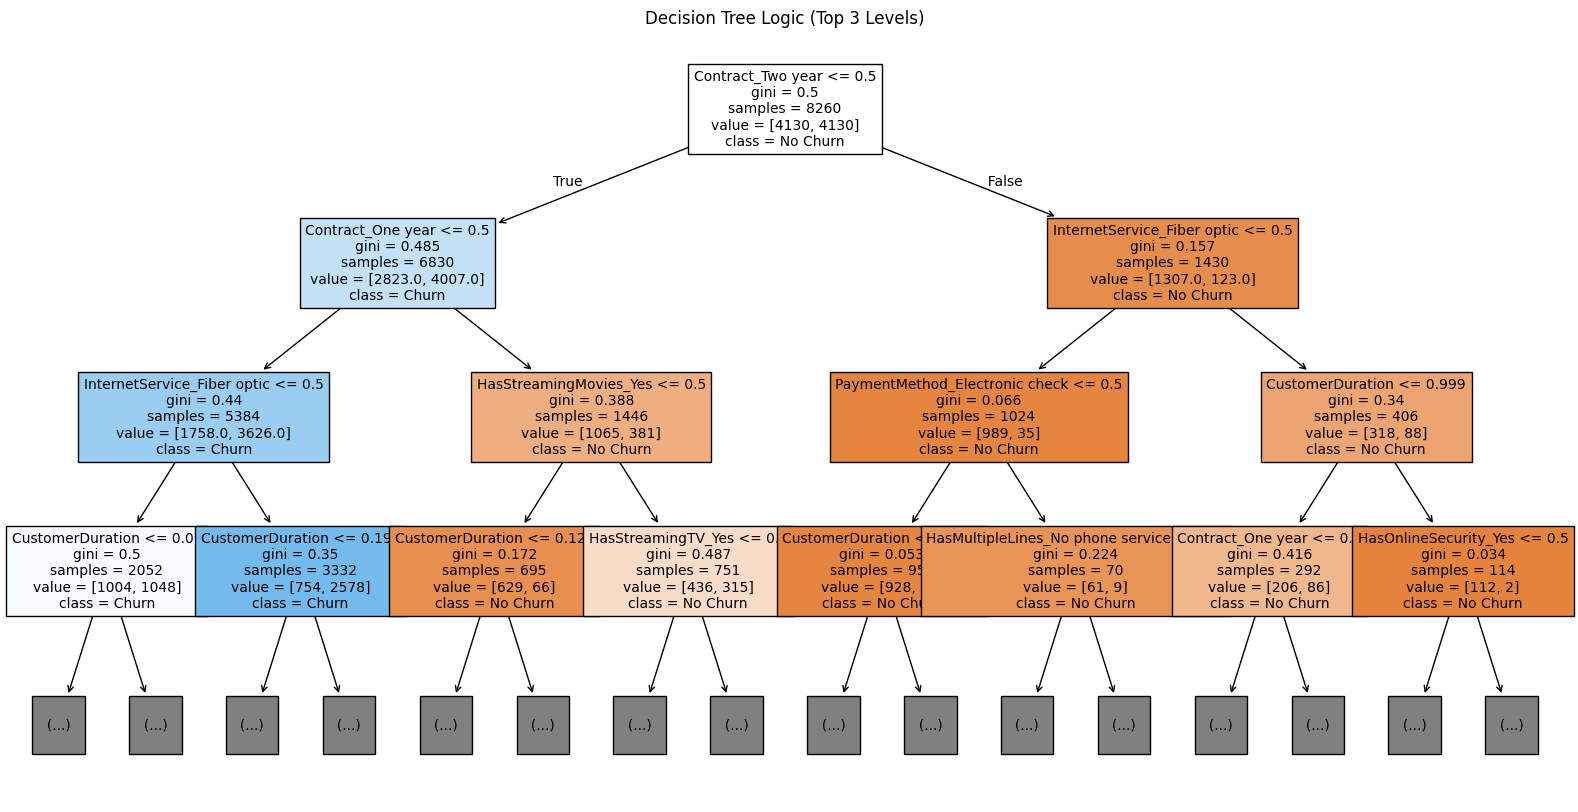

In [379]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['No Churn', 'Churn'],
          filled=True,
          fontsize=10,
          max_depth=3) # Limit depth just for plotting clarity
plt.title("Decision Tree Logic (Top 3 Levels)")
plt.show()

Hyperparameter Tuning for Dicision Tree

In [380]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# 1. Define the "Grid" of settings to test
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# 2. Run the Search (GridSearchCV)
# cv=5 means it checks each setting 5 times to be sure
print("Tuning Decision Tree...")
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='recall') # Optimize for Recall (finding churners)
grid_search.fit(X_train, y_train)

# 3. Get the Best Model
best_dt_model = grid_search.best_estimator_

print(f"\nBest Settings Found: {grid_search.best_params_}")

# 4. Evaluate the Best Model
y_pred_dt = best_dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print(f"Optimized Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print("\nDecision Tree Report (Tuned):")
print(classification_report(y_test, y_pred_dt))

Tuning Decision Tree...

Best Settings Found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Optimized Decision Tree Accuracy: 63.75%

Decision Tree Report (Tuned):
              precision    recall  f1-score   support

           0       0.92      0.55      0.69      1033
           1       0.41      0.87      0.56       374

    accuracy                           0.64      1407
   macro avg       0.67      0.71      0.63      1407
weighted avg       0.79      0.64      0.66      1407



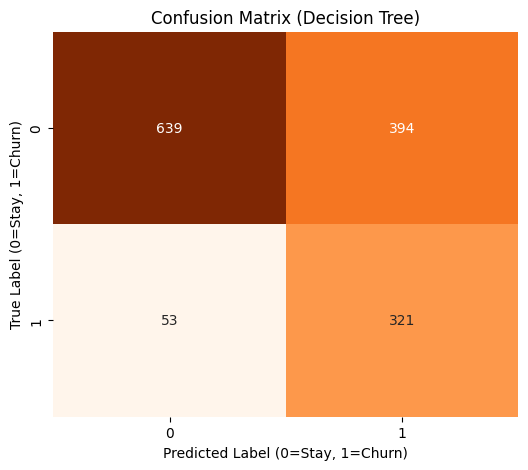

In [381]:
# 1. Get Predictions (if not already stored)
y_pred_dt = dt_model.predict(X_test)

# 2. Calculate Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# 3. Plot Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Label (0=Stay, 1=Churn)')
plt.ylabel('True Label (0=Stay, 1=Churn)')
plt.show()

# Task 3: AI Ethics and Post-Deployment Strategy

## 3.1 Ethical Considerations
* **Bias Mitigation:** The initial data exploration revealed a class imbalance (73% No Churn vs 26% Churn). Training on this directly would create a biased model that ignores the minority class. To mitigate this ethically, we applied **SMOTE (Synthetic Minority Over-sampling Technique)** and used **Class Weights** during training. This ensures the algorithm treats all customer groups fairly, rather than favoring the majority.
* **Data Privacy (GDPR):** The dataset contains customer behavioral data. In a real-world deployment, all Personally Identifiable Information (PII) such as `customerID` must be hashed or removed to comply with GDPR regulations. The model should only process anonymized features.

## 3.2 Post-Deployment Strategy
* **Model Monitoring:** Customer behavior changes over time (Data Drift). We will implement a monitoring system that tracks the distribution of incoming data (e.g., `MonthlyCharges`). If the live data deviates significantly from the training data, an alert will trigger a re-training pipeline.
* **Human-in-the-Loop:** Predictions with a "Churn Probability" between 40-60% are uncertain. These cases should not trigger automatic actions (like discounts) but should be routed to a human customer support agent for review, ensuring that we do not annoy satisfied customers with unnecessary retention emails.